In [12]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt


import numpy as np

print(f"**TensorFlow Version:** {tf.__version__}")
print(f"**OpenCV (cv2) Version:** {cv2.__version__}")
print(f"**NumPy Version:** {np.__version__}")
print(f"**Matplotlib Version:** {matplotlib.__version__}")
print(f"**OS Module:** Successfully imported (Standard Python library)")

**TensorFlow Version:** 2.20.0
**OpenCV (cv2) Version:** 4.12.0
**NumPy Version:** 2.1.3
**Matplotlib Version:** 3.10.0
**OS Module:** Successfully imported (Standard Python library)


In [13]:
path = r"D:\New folder (4)\Downloads\archive\data\test\sleepy\s0037_05452_1_1_0_0_0_01.png"
img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

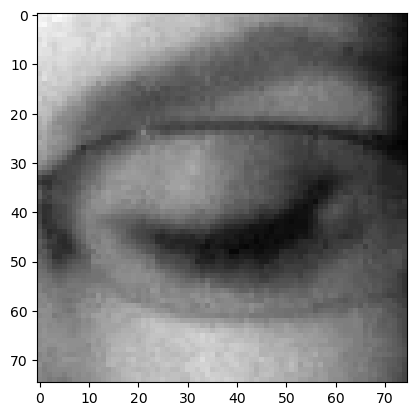

In [14]:
plt.imshow(img_array,cmap="gray")

In [15]:
img_array.shape


(75, 75)

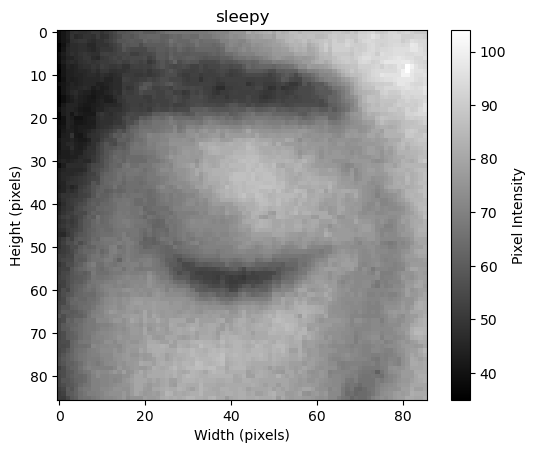

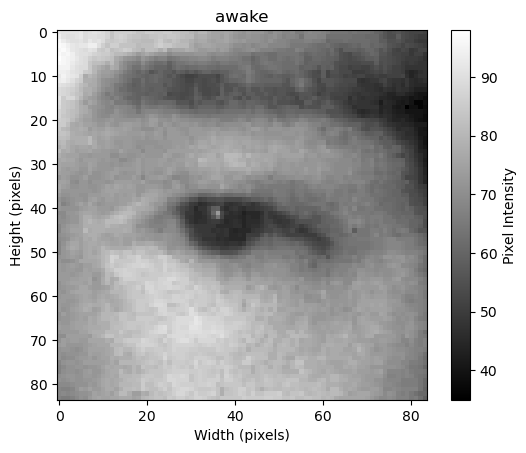

In [16]:
DataDirectory = r"D:\New folder (4)\Downloads\archive\data\test"
Classes = ["sleepy", "awake"]

for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

        plt.imshow(img_array, cmap="gray")
        plt.title(category)
        plt.xlabel("Width (pixels)")
        plt.ylabel("Height (pixels)")
        plt.colorbar(label="Pixel Intensity")  # shows intensity scale on the side
        plt.show()

        break

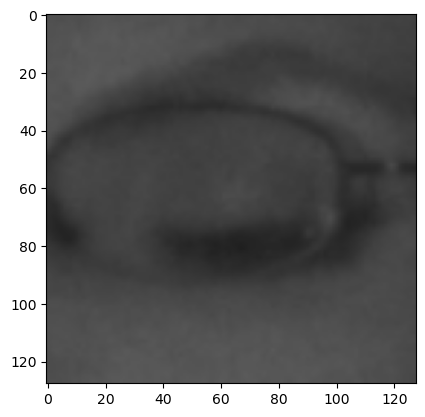

In [25]:
img_size=128
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

reading all images and converting into array for data and labels


In [26]:
img_size = 128
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (128, 128))

                training_Data.append([new_array, class_num])
            except Exception as e:
                pass


In [27]:
create_training_Data()

In [28]:
print(len(training_Data))

16981


In [29]:
import random 
random.shuffle(training_Data)

 X shape: (16981, 128, 128, 3)
 Y shape: (16981,)


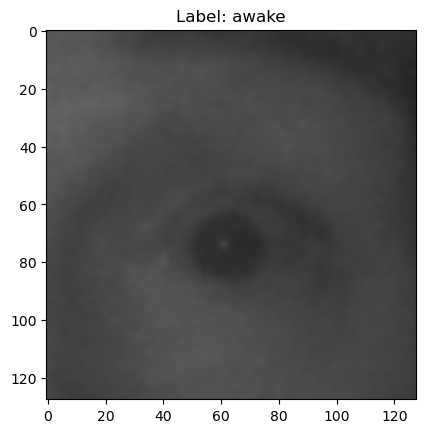

In [30]:
X = []
Y = []

for features, label in training_Data:
    X.append(features)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

print(" X shape:", X.shape)
print(" Y shape:", Y.shape)

# Show one image
plt.imshow(X[0])
plt.title(f"Label: {Classes[Y[0]]}")
plt.axis("on")  # shows the scale
plt.show()


In [31]:
X=X/255.0;

In [32]:
Y=np.array(Y)

In [33]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

Deep Learning

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
model=tf.keras.applications.mobilenet.MobileNet()

In [36]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Transfer Learning

In [37]:
base_input=model.layers[0].input

In [38]:
base_output=model.layers[-4].output

In [39]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [40]:
# Define base model
base_model = keras.applications.mobilenet.MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add layers
base_input = base_model.input
base_output = base_model.output

Flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layers)
final_output = layers.Activation('sigmoid')(final_output)

# Define final model
new_model = keras.Model(inputs=base_input, outputs=final_output)

# Show model summary
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 3,257,153 (12.43 MB)

 Non-trainable params: 21,888 (85.50 KB)

settings for binary classification (awake/sleepy)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam


X_resized = np.array([tf.image.resize(img, (128, 128)).numpy() for img in X])
X_resized = X_resized.astype('float32') / 255.0


Y = np.array(Y)


base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

new_model = Model(inputs=base_model.input, outputs=predictions)

new_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

history = new_model.fit(
    X_resized, Y,
    epochs=1,
    validation_split=0.1,
    batch_size=32
)

new_model.save('my_model.h5')
print("✅ Model saved as 'my_model.h5'")


In [4]:
import cv2

# Load an image in grayscale
img_array = cv2.imread(r"D:\New folder (4)\Downloads\archive\data\train\sleepy\s0037_05546_1_1_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB (3 channels) - required by model input
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

# Resize to the required model input size
new_array = cv2.resize(backtorgb, (128, 128))


In [5]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load your trained model
new_model = load_model("my_model.h5", compile=False)

# Load and prepare image
img_array = cv2.imread(r"D:\New folder (4)\Downloads\archive\data\train\sleepy\s0037_05546_1_1_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (128, 128))

X_input = np.array(new_array).reshape(1, 128, 128, 3)
X_input = X_input / 255.0

# Predict
prediction = new_model.predict(X_input)
print(prediction)

# YouTube-style output
if prediction > 0.5:
    print("Person is Sleepy 😴")
else:
    print("Person is Awake 😊")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.16708526]]
Person is Awake 😊


In [173]:
img_array = cv2.imread(r"D:\New folder (4)\Desktop\s0037_05923_1_1_0_1_1_01.png", cv2.IMREAD_GRAYSCALE)

backtorgb= cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [174]:
X_input. shape

(1, 128, 128, 3)

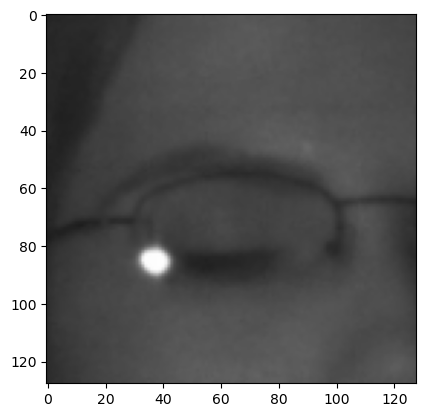

In [175]:
plt.imshow(new_array)

In [181]:
x_input = np.expand_dims(new_array, axis=0) / 255.0

In [177]:
prediction=new_model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [180]:
prediction


array([[0.1040142]], dtype=float32)